#############################################################################
Shape of both datasets joint
(1942420, 17)
#############################################################################
Catgeories of the new variable
['M' 'N' 'E' 'A']
#############################################################################
Relative frequencies
E    631164
A    566760
M    473142
N    271354
Name: tpep_pickup_hour_timezone, dtype: int64
2.219008445739746


Text(0.5, 0, 'Categories')

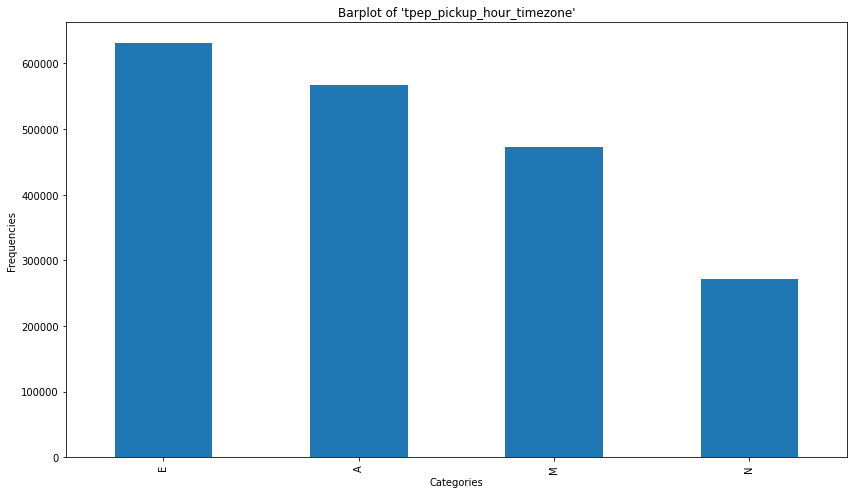

In [4]:
########################################### STUDY 1 ###################################################

# Import libraries
import pandas as pd
import numpy as np
import time
import matplotlib as plt

# Read both datasets and concatenate. 

data1 = pd.read_csv("tripdata_2017-01.csv")
data2 = pd.read_csv("tripdata_2017-02.csv")
data = pd.concat([data1,data2])

print("#############################################################################")
print("Shape of both datasets joint")
print(data.shape)

start = time.time()
# Change the format of variable to datetime and extract the hour
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].astype('datetime64[ns]') 
data['tpep_pickup_hour'] = data.tpep_pickup_datetime.dt.hour


# Convert the discrete variable to continuous variable
col         = 'tpep_pickup_hour'
conditions  = [ (data[col] >= 0) & (data[col] < 6), 
                (data[col]>= 6) & (data[col] < 12), 
               (data[col]>= 12) & (data[col] < 18),
               (data[col]>= 18) & (data[col] <= 24) 
  ]
choices     = [ 'N', 'M', 'A', 'E']
    
data["tpep_pickup_hour_timezone"] = np.select(conditions, choices, default=np.nan)

# Now there are only four categories which express the time zone

print("#############################################################################")
print("Catgeories of the new variable")
print(data['tpep_pickup_hour_timezone'].unique())

# Relative frequencies
print("#############################################################################")
print("Relative frequencies")
print(data['tpep_pickup_hour_timezone'].value_counts())
end = time.time()
print(end-start)

# Barlot of the new variable created
plot = data['tpep_pickup_hour_timezone'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Barplot of 'tpep_pickup_hour_timezone'")

plot.set_ylabel('Frequencies')
plot.set_xlabel('Categories')